In [2]:
import pandas as pd
import re

In [71]:
female_names = [
    'Abby', 'Adriana', 'Alberta', 'Alexia', 'Alice', 'Alicia', 'Alida', 'Alison', 'Allison', 'Amelia',
    'Ami', 'Amy', 'Ana', 'Angela', 'Ann', 'Anna', 'Ari', 'Ariana', 'Arya', 'Aubrey', 'Audrey', 'Bailey',
    'Beth', 'Bethany', 'Betsy', 'Billie', 'Brenda', 'Bri', 'Casey', 'Cassie', 'Catherine', 'Cathy',
    'Celia', 'Charli', 'Charlotte', 'Cherise', 'Christi', 'Christine', 'Cindi', 'Claire', 'Clara',
    'Claudia', 'Cora', 'Danika', 'Danielle', 'Daphne', 'Darlene', 'Diane', 'Dina', 'Donna', 'Doris',
    'Dorothy', 'Dotty', 'Elena', 'Elizabeth', 'Ellen', 'Emily', 'Emma', 'Eve', 'Evelyn', 'Felicia',
    'Fran', 'Francie', 'Francine', 'Geena', 'Ginger', 'Glenda', 'Haley', 'Halley', 'Hannah', 'Hazel',
    'Heather', 'Helen', 'Helena', 'Hilda', 'India', 'Irma', 'Isabel', 'Jacquie', 'Jamy', 'Janel',
    'Janice', 'Janine', 'Jasmine', 'Jen', 'Jenna', 'Jennifer', 'Jennifers', 'Jess', 'Jessie', 'Jessy',
    'Jill', 'Joanna', 'Joanne', 'Jodi', 'Juicy', 'Julie', 'Juliette', 'Kara', 'Kat', 'Katelyn', 'Kathy',
    'Katia', 'Katie', 'Katrina', 'Katy', 'Kayla', 'Kelly', 'Kelsey', 'Kenya', 'Kerri', 'Kira', 'Kristen',
    'Kristin', 'Lana', 'Lara', 'Lauren', 'Leslie', 'Linda', 'Lisa', 'Lorelei', 'Lorena', 'Louise', 'Lucy',
    'Mabel', 'Maddie', 'Mae', 'Maggie', 'Mallory', 'Marcy', 'Maria', 'Mariah', 'Marianne', 'Marilyn',
    'Marissa', 'Marla', 'Martha', 'Mary', 'Maryann', 'Melinda', 'Mina', 'Mindy', 'Misty', 'Monica',
    'Mya', 'Nancy', 'Natalie', 'Natasha', 'Nina', 'Olga', 'Olivia', 'Paisley', 'Pam', 'Pamela', 'Pat',
    'Patricia', 'Patti', 'Paula', 'Peggy', 'Priscilla', 'Rachel', 'Ramona', 'Rebecca', 'Rhiannon',
    'Rhonda', 'Rosalind', 'Rose', 'Ruby', 'Sadie', 'Sally', 'Samantha', 'Sandy', 'Sara', 'Sarah',
    'Scarlett', 'Selma', 'Shannon', 'Sharon', 'Shelley', 'Shirley', 'Sissy', 'Sue', 'Susan', 'Susie',
    'Suzie', 'Tabatha', 'Tanya', 'Tara', 'Tasha', 'Tatianna', 'Taylor', 'Teresa', 'Terri', 'Tia',
    'Tina', 'Tracy', 'Venus', 'Victoria', 'Wanda', 'Wendy', 'Zelda', 'Zora'
]


male_names = [
    'Aaron', 'Aarons', 'Achilles', 'Adam', 'Adams', 'Aiden', 'Alfred', 'Ali', 'Allen', 'Andrew', 'Andy', 'Angel', 'Anthony',
    'Ari', 'Arnold', 'Arthur', 'Barry', 'Ben', 'Benjamin', 'Bennett', 'Bertram', 'Beto', 'Bill', 'Billy', 'Bob', 'Bobby',
    'Braden', 'Bradley', 'Bret', 'Brett', 'Brian', 'Bruce', 'Bryan', 'Bryce', 'Byron', 'Cal', 'Cameron', 'Carl', 'Carter',
    'Casper', 'Cate', 'Chad', 'Charles', 'Charlie', 'Chip', 'Chris', 'Christopher', 'Chuck', 'Clint', 'Colby', 'Connor',
    'Damien', 'Dan', 'Daniel', 'Danny', 'Darren', 'David', 'Dean', 'Derrick', 'Don', 'Donald', 'Doug', 'Dwight', 'Earl', 'Ed',
    'Eddy', 'Eli', 'Elmer', 'Evan', 'Frank', 'Franklin', 'Fred', 'Gabe', 'Gary', 'Gavin', 'George', 'Gordon', 'Greg', 'Hamza',
    'Hank', 'Harry', 'Henry', 'Hunter', 'Igor', 'Jack', 'Jackson', 'Jacob', 'Jake', 'Jame', 'James', 'Jameson', 'Jamie', 'Jamy',
    'Jan', 'Jay', 'Jeb', 'Jeff', 'Jefferson', 'Jeffrey', 'Jeramy', 'Jeremy', 'Jerry', 'Jesus', 'Joe', 'Joel', 'Joey', 'John',
    'Johnathan', 'Jon', 'Jonathan', 'Josh', 'Joshua', 'Justin', 'Ken', 'Kendall', 'Kenneth', 'Kenny', 'Kevin', 'Kyle', 'Leo',
    'Leonard', 'Leroy', 'Leslie', 'Liam', 'Logan', 'Lonnie', 'Lucas', 'Luke', 'Mack', 'Major', 'Manfred', 'Marco', 'Marcus',
    'Mark', 'Matt', 'Matthew', 'Max', 'Michael', 'Michaels', 'Miguel', 'Mitch', 'Mohammad', 'Morgan', 'Nathan', 'Ned', 'Neil',
    'Nick', 'Nixon', 'Noah', 'Norman', 'Ollie', 'Owen', 'Patrick', 'Paul', 'Paulie', 'Perry', 'Pete', 'Peter', 'Phil', 'Philip',
    'Phillipe', 'Preston', 'Quentin', 'Quinn', 'Ralph', 'Randy', 'Ray', 'Rich', 'Richard', 'Rick', 'Rickley', 'Ricky', 'Riley',
    'Rob', 'Robert', 'Roger', 'Rogers', 'Ron', 'Royce', 'Russ', 'Ryan', 'Sam', 'Samuel', 'Scott', 'Seth', 'Shane', 'Stan',
    'Stephen', 'Steve', 'Steven', 'Ted', 'Terry', 'Thomas', 'Timothy', 'Toby', 'Tom', 'Tommy', 'Tony', 'Tyler', 'Walt',
    'Walter', 'William', 'Yuri'
]
prenoms_masculins = [
    'Ian', 'Dennis', 'Kyle', 'Logan', 'Craig', 'Derrick', 'Robert', 'Donald', 'William', 'Neil',
    'Kenneth', 'Eric', 'Kevin', 'Jason', 'Benjamin', 'Joseph', 'John', 'Aaron', 'Nick', 'Adam', 'Matthew',
    'Justin', 'Michael', 'Joel', 'Christopher', 'Steven', 'Brett', 'Jeffrey', 'Jim', 'Byron', 'Brian', 'Samuel',
    'Cricket', 'Jack', 'Lawrence', 'Randy', 'Ryan', 'Avid', 'Bill', 'Bob', 'Hunter', 'Jordan', 'Jay', 'Jeremy',
    'George', 'Ricky', 'Jake', 'David', 'Patrick', 'Joe', 'Don', 'Ken', 'Kenny', 'Mike',
    'Shane', 'Josh', 'Tim', 'Earl', 'Kim', 'Casper', 'Josh', 'Tim', 'Jay', 'Jeremy', 'Gavin',
    'Jay', 'Jeremy', 'David', 'Peter', 'Kendall', 'Jacob', 'Josh', 'Tim', 'Gordon', 'Daniel', 'Max',
    'Matt', 'Tim', 'Ken', 'Kevin', 'Joseph', 'Paul', 'George', 'Jeremy', 'Joseph', 'Brian', 'Nick', 'Nick', 'Ken',
    'Jake', 'Steve', 'Tom', 'Frank', 'Mike', 'Peter', 'Henry', 'Larry', 'John', 'James', 'Kyle', 'Tim', 'Michael',
    'Dave', 'Matt', 'Ben', 'Dustin', 'Oliver', 'Matt', 'Andy', 'Pete', 'Jake', 'Aaron', 'Brennan', 'Jason', 'James',
    'Thomas', 'Charles', 'Richard', 'Walter', 'Barry', 'Tom', 'Greg', 'Jerry', 'Mark', 'Johnny', 'Todd', 'Bobby',
    'Joe', 'Daniel', 'Sam', 'Chris', 'Josh', 'Will', 'Timothy', 'Samuel', 'Jack', 'Dustin', 'Johnny', 'Peter', 'Jerry',
    'Nelson', 'he'
]

prenoms_feminins = [
    'Patricia', 'Megan', 'Jessica', 'Elena', 'Tanya', 'Amy', 'Jennifer', 'Sue', 'Natalie', 'Betty', 'Kayla', 'Emily',
    'Felicia', 'Sarah', 'Jane', 'Christine', 'Victoria', 'Samantha', 'Katrina', 'Mary', 'Laura',
    'Rachel', 'Monica', 'Maria', 'Joan', 'Carrie', 'Angela', 'Cynthia', 'Tea', 'Avid', 'Rebecca', 'Jill', 'Michelle',
    'Jen', 'Brenda', 'Nancy', 'Tina', 'Pam', 'Margot', 'Donna', 'Glenda', 'Sheila', 'Callie',
    'Dina', 'Heather', 'Cathy', 'Susan', 'Fred', 'Jenny', 'Kenny', 'Jenny', 'Lauren',
    'Erin', 'Sandy', 'Erica', 'Sandy', 'Valentine', 'Sherry', 'Beth', 'Carla', 'Daphne', 'Rebecca', 'Tina',
    'Helen', 'Margaret', 'Emily', 'Rachel', 'Laura', 'Joanna', 'Jill', 'Lucy', 'Nina', 'Kimberly', 'Kate', 'Sally',
    'Zoe', 'Maggie', 'Olivia', 'Stephanie', 'Selma', 'Ruby', 'Ginger', 'Rita', 'Penny', 'Olga', 'Katie', 'Maggie',
    'Claire', 'Paula', 'Fiona', 'Marie', 'Monica', 'Hannah', 'Gabrielle', 'Jessica', 'Rita', 'Gina', 'Helen', 'Anna',
    'Elizabeth', 'Sophia', 'Isabel', 'Charlotte', 'Olivia', 'Emily', 'Pippa', 'Jessica', 'Naomi', 'Kristen', 'Melanie',
    'Amanda', 'Ruth', 'Leah', 'Tiffany', 'Mia', 'Eva', 'Dina', 'Christina', 'Mira', 'Maggie', 'Rachel', 'Lauren',
    'Lena', 'Sarah', 'Tasha', 'Amelia', 'Sophia', 'Rachel', 'Katie', 'Hannah', 'Juliette', 'Sandra', 'Melanie',
    'Rosie', 'Helen', 'Emma', 'Julia', 'Emma', 'Anna', 'Barbara', 'Mandy', 'Claudia', 'Jasmine', 'Sasha', 'Julia',
    'Zoe', 'Faith', 'Adriana', 'Sophie', 'Alice', 'Vera', 'Emily', 'Betty', 'Nicole', 'Ava', 'Diana', 'Maria', 'Charlotte',
    'Lindsey', "she"
]

male_names += prenoms_masculins
female_names += prenoms_feminins

In [72]:
# Charger le fichier CSV
df = pd.read_csv("class_3_cut.csv")
 # Remplace par le nom réel

def extract_sentence_with_regex(text_string):
    text_string = str(text_string)
    """
    Extrait la phrase d'une chaîne de caractères en utilisant une expression régulière.
    Cette fonction est utile si la chaîne n'est pas un JSON parfaitement valide
    ou si l'utilisation du module 'json' est à éviter.

    Args:
        text_string (str): La chaîne de caractères contenant le texte à analyser.

    Returns:
        str or None: La phrase extraite si le motif est trouvé, sinon None.
    """
    # Gérer le cas où l'entrée n'est pas une chaîne
    if not isinstance(text_string, str):
        return None

    # La regex cherche :
    # 1. '"sentence": "' : Le début de la clé "sentence" et de sa valeur.
    # 2. (.*?) : Un groupe de capture non-gourmand pour la phrase elle-même.
    #    Le '.*?' capture n'importe quel caractère (sauf les sauts de ligne)
    #    zéro ou plusieurs fois, mais de manière "non-gourmande", ce qui signifie
    #    qu'il s'arrête au premier motif suivant qu'il trouve.
    # 3. '"' : Le guillemet fermant qui indique la fin de la valeur de la phrase.
    # 4. (?=,\s"(?:option1|option2|answer)"|}) : C'est une "assertion de prévisualisation positive" (positive lookahead).
    #    - Elle assure que ce qui précède est suivi par un de ces motifs,
    #      MAIS NE L'INCLUT PAS dans le texte capturé par (.*?).
    #    - `,\s"` : Une virgule, un espace et un guillemet ouvrant.
    #    - `(?:option1|option2|answer)"` : Un groupe non-capturant qui cherche "option1", "option2" ou "answer",
    #      suivi de leur guillemet fermant.
    #    - `|}` : Ou, une accolade fermante (si "sentence" est le dernier élément).
    # Cette lookahead est cruciale pour que la capture (.*?) s'arrête JUSTE AVANT
    # ces éléments de fin et ne les inclue pas dans la phrase.
    match = re.search(r'"sentence":\s"(.*?)"(?=,\s"(?:option1|option2|answer)"|})', text_string)

    if match:
        # match.group(1) contient le texte capturé par le premier groupe (.*?)
        return match.group(1).strip()

    return None # Retourne None si aucun motif n'est trouvé

df['text'] = df["text"].apply(extract_sentence_with_regex)
# positive_texts = df[df['label'] == 1]['text'].tolist()  # Phrases avec "nsp"

list_ask = df[df['content_moderation'].str.contains('ask', na=False)]['text'].tolist()
list_hesitation = df[df['content_moderation'].str.contains('hesitation', na=False)]['text'].tolist()
list_friendship = df[df['content_moderation'].str.contains('friendship', na=False)]['text'].tolist()
list_family = df[df['content_moderation'].str.contains('family', na=False)]['text'].tolist()
list_DIY = df[df['content_moderation'].str.contains('DIY', na=False)]['text'].tolist()
list_wealth = df[df['content_moderation'].str.contains('wealth', na=False)]['text'].tolist()
list_sickness = df[df['content_moderation'].str.contains('sickness', na=False)]['text'].tolist()
list_chores = df[df['content_moderation'].str.contains('chores', na=False)]['text'].tolist()
list_failure = df[df['content_moderation'].str.contains('failure', na=False)]['text'].tolist()
list_success = df[df['content_moderation'].str.contains('success', na=False)]['text'].tolist()

# list_hesitation = df[df['sentiment'] == 'relationship, helping']['text'].tolist() 

# list_failure = df[df['sentiment'] == 'Failure']['text'].tolist()
# list_performance = df[df['sentiment'] == 'performance, sucess, competence']['text'].tolist() 
# list_hesitation = df[df['sentiment'] == 'hesitation, question, advice']['text'].tolist() 


In [73]:
positive_labels = [list_ask , list_hesitation, list_friendship, list_family, list_DIY, list_wealth, list_sickness, list_chores, list_failure, list_success]

# positive_labels.append(df_comp[df_comp['classe'] == 'comparison']['sentence'].tolist())
# positive_labels.append(df_relationship[df_relationship['classe'] == 'relationship']['sentence'].tolist())
# positive_labels.append(df_failure[df_failure['classe'] == 'failure']['sentence'].tolist())  
# positive_labels.append(df_perfomance[df_perfomance['classe'] == 'performance']['sentence'].tolist())
# positive_labels.append(df_hesitation[df_hesitation['classe'] == 'hesitation']['sentence'].tolist())



In [74]:
def genre_percentage(tab_sent, schema):
    counter_female, counter_male, counter_autre = 0,0, 0

    for sentence in tab_sent:
        f = any(word in female_names for word in re.split(r"['\s]+", sentence))
        m = any(word in male_names for word in re.split(r"['\s]+", sentence))
        if f:
            counter_female += 1
        if m:
            counter_male += 1
        if not(f) and not(m):
            counter_autre += 1
    per_female = counter_female / len(tab_sent) * 100
    per_male = counter_male / len(tab_sent) * 100
    per_autre = counter_autre / len(tab_sent) * 100
    return per_female, per_male, per_autre

schemas = ['ask' , 'hesitation', 'friendship', 'family', 'DIY', 'wealth', 'sickness', 'chores', 'failure', 'success']
schemas_2 =  ['ask' ] *3 + ['hesitation'] * 3 +['friendship'] * 3 + ['family'] *3 + ['DIY'] *3 + ['wealth'] *3 + ['sickness'] * 3 + ['chores'] * 3+ ['failure'] * 3 + ['success']*3 
data = {
    'Genre': ['femmes', 'hommes', 'autres'] * 10,
    'Pourcentage des phrases' : [],
    'Schéma': schemas_2
}

for i in range(len(schemas)):
    data['Pourcentage des phrases'].extend(genre_percentage(positive_labels[i], schemas[i]))  # Assuming the class names are in the same order as the dataframes

In [57]:
schemas_2

['ask',
 'ask',
 'ask',
 'hesitation',
 'hesitation',
 'hesitation',
 'friendship',
 'friendship',
 'friendship',
 'family',
 'family',
 'family',
 'DIY',
 'DIY',
 'DIY',
 'wealth',
 'wealth',
 'wealth',
 'sickness',
 'sickness',
 'sickness',
 'chores',
 'failure',
 'failure',
 'failure',
 'success',
 'success',
 'success']

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Création d'un exemple de DataFrame

df = pd.DataFrame(data)

print("Aperçu de notre DataFrame :")
print(df.head())
print("-" * 30)

Aperçu de notre DataFrame :
    Genre  Pourcentage des phrases      Schéma
0  femmes                53.846154         ask
1  hommes                47.252747         ask
2  autres                 1.098901         ask
3  femmes                44.000000  hesitation
4  hommes                20.000000  hesitation
------------------------------


[] []


<Figure size 1200x600 with 0 Axes>

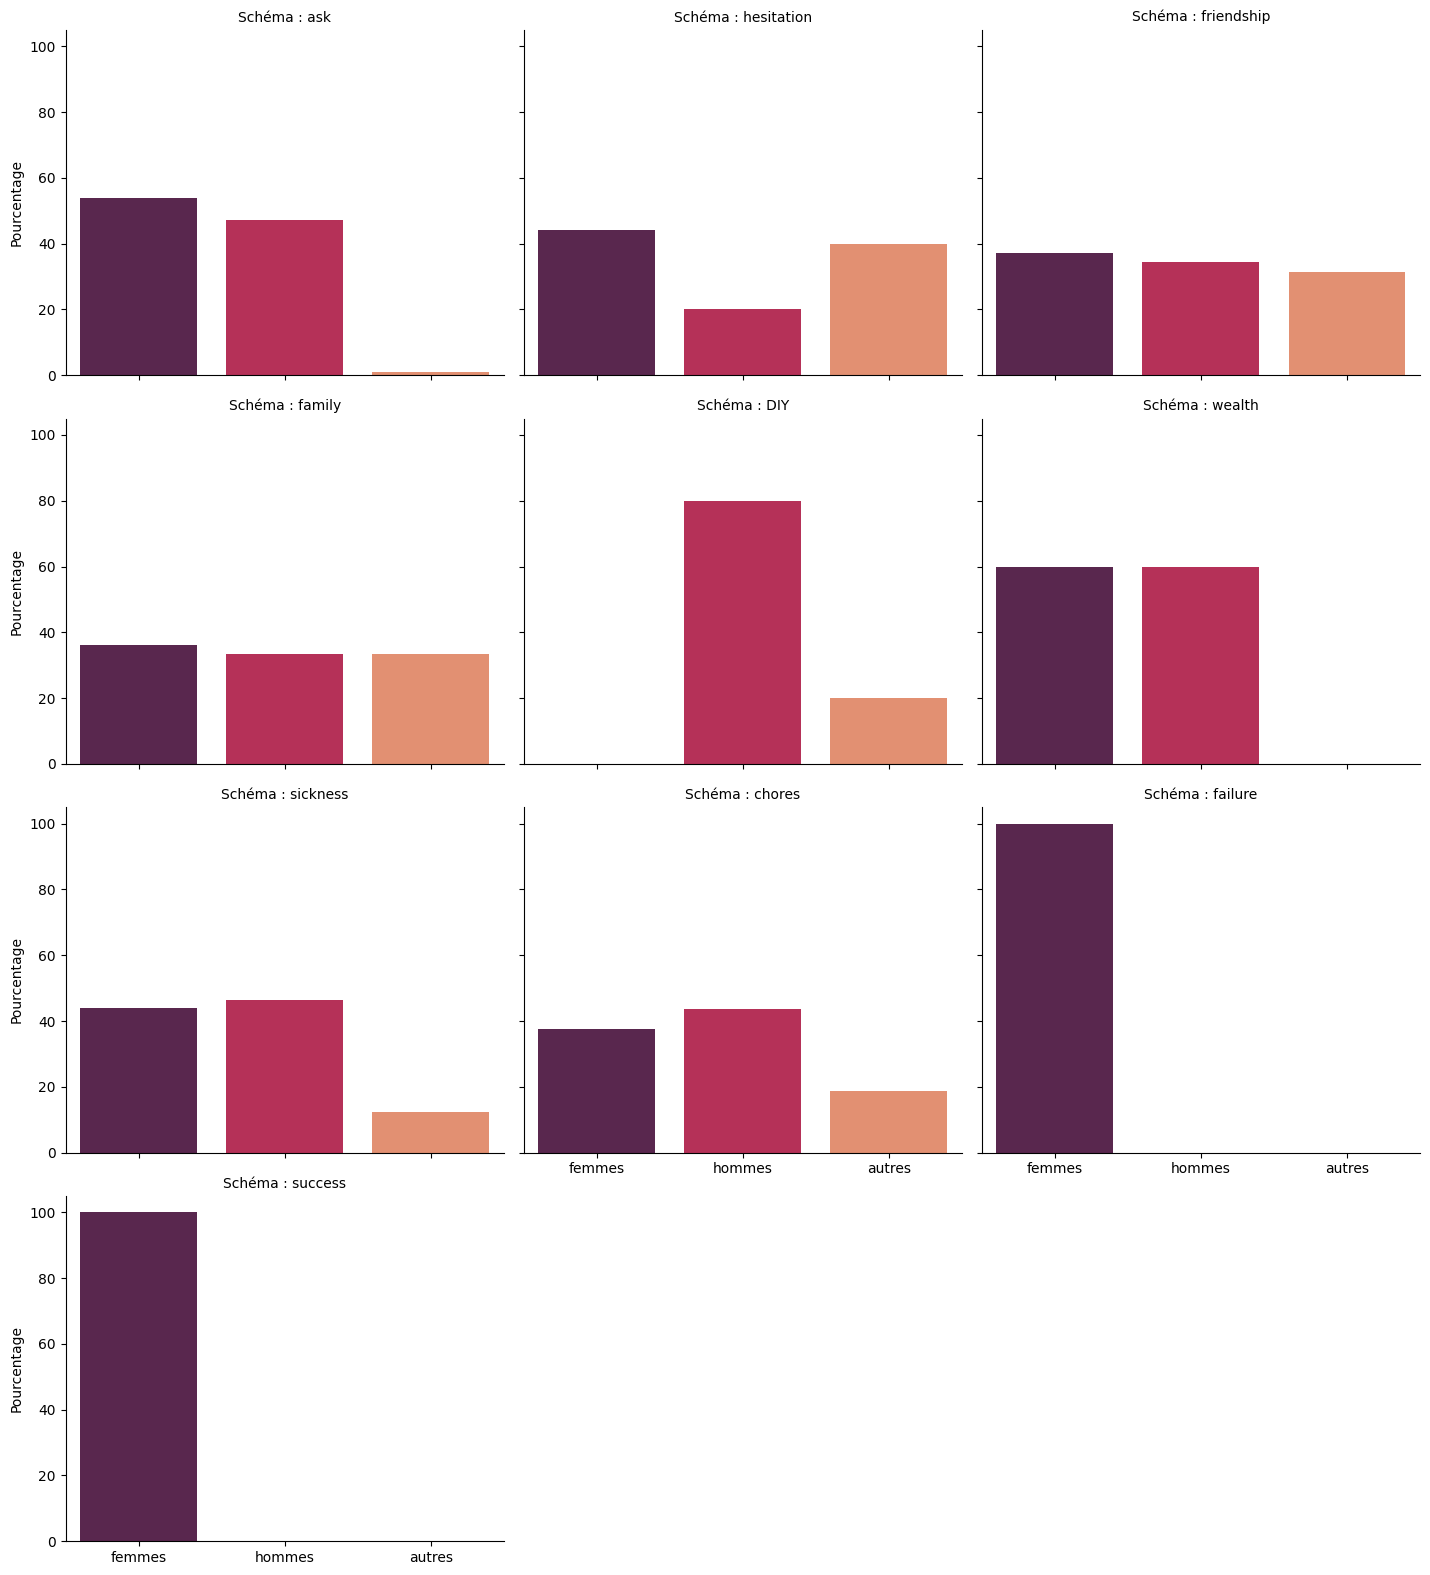

In [77]:
# Avec catplot, c'est encore plus simple pour créer des sous-graphiques par catégorie
# La colonne 'col' spécifie la variable par laquelle diviser les graphiques
# 'kind' spécifie le type de graphique (ici 'bar' pour bâtons)

plt.figure(figsize=(12, 6)) # figsize ici n'est qu'indicatif, catplot gère bien les dimensions internes

g = sns.catplot(
    data=df,
    x='Genre',
    y='Pourcentage des phrases',
    col='Schéma', # Crée une colonne de graphiques pour chaque région
    kind='bar',
    col_wrap=3,   # Afficher 2 graphiques par ligne
    height=4,     # Hauteur de chaque sous-graphique
    aspect=1.2,   # Ratio d'aspect de chaque sous-graphique
    hue='Genre',       # <-- Assignez la variable 'x' à 'hue'
    palette='rocket', # Palette de couleurs pastel
    errorbar=None # Pour ne pas afficher les barres d'erreur si la moyenne est déjà agrégée
,legend=False,           # Assurez-vous que la légende est générée
    legend_out=False       # <-- TRÈS IMPORTANT : Dit à Seaborn de NE PAS placer la légende en dehors par défaut
)

handles, labels = g.axes.flat[0].get_legend_handles_labels()

# g.fig.legend(
#     handles=handles,
#     labels=labels,
#     title='Légende', # Titre de la légende
#     bbox_to_anchor=(1, 0), # Coin inférieur droit de la figure
#     loc='lower right',     # Ancre le coin inférieur droit de la légende à (1, 0)
#     borderaxespad=0.1,
#     frameon=True,
#     fancybox=True,
#     shadow=True
# )

print(handles, labels)
# Ajuster les titres et labels
g.set_axis_labels("", "Pourcentage") # Notez que catplot par défaut agrège en moyenne
g.set_titles("Schéma : {col_name}")
g.fig.suptitle('', y=1.02) # Titre global de la figure

plt.tight_layout()
plt.show()